# Introduction

The purpose of this journal is to explore image processing techniques for roadway images. The topics covered include color and region masking of an image to segment out roadways.

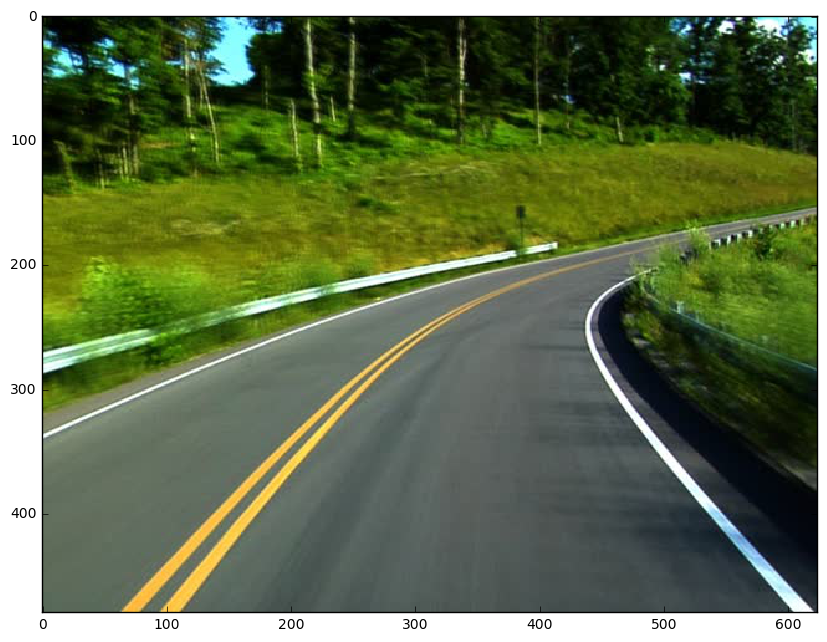

In [175]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Read in the image
image = mpimg.imread('test2.jpg')

# Grab size of image
y_size, x_size = image.shape[0:2]

# Create Copies
image_color_filter = np.copy(image)
image_region_mask = np.copy(image)

# Original Image
plt.imshow(image)

### Threshold Image by Color
Taking a full color image, mask all pixels (drop color values to zero) where the pixel intensities are not sufficient for the color white.

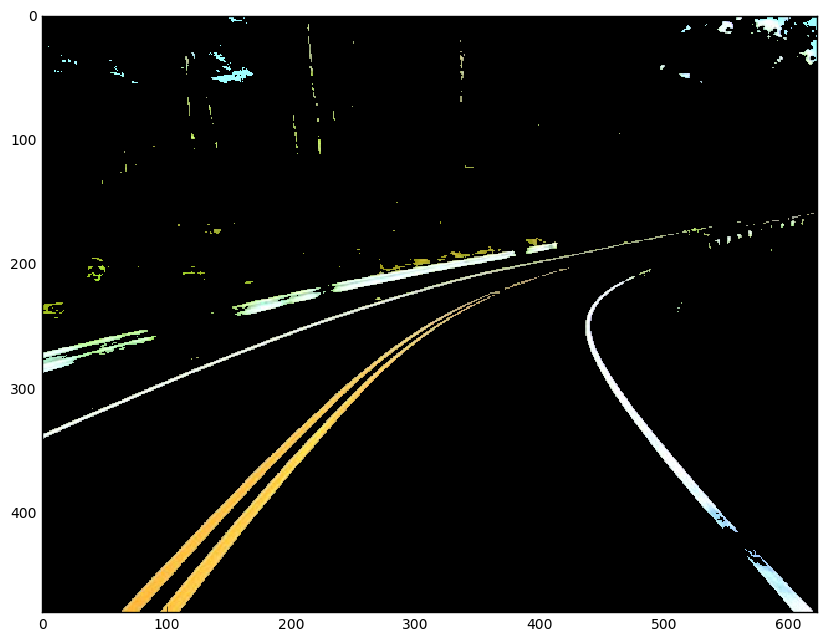

In [183]:
def color_mask(img, red=150, green=150, blue=0):

    filtered_image = np.copy(img)
    # Color Threshold
    rgb_threshold = [red, green, blue]

    # Reduce values below threshold
    meets_threshold = (img[:, :, 0] < rgb_threshold[0]) \
                    | (img[:, :, 1] < rgb_threshold[1]) \
                    | (img[:, :, 2] < rgb_threshold[2])

    filtered_image[meets_threshold] = [0, 0, 0]
    
    return filtered_image

plt.imshow(color_mask(img=image_color_filter))

### Segment Image by Region
Looking at the image above, turns out there are areas in the picture that contained colors matching the color filter, so they did not get masked by color thresholding. Here, the picture will be masked by a triangular region where the road should be.

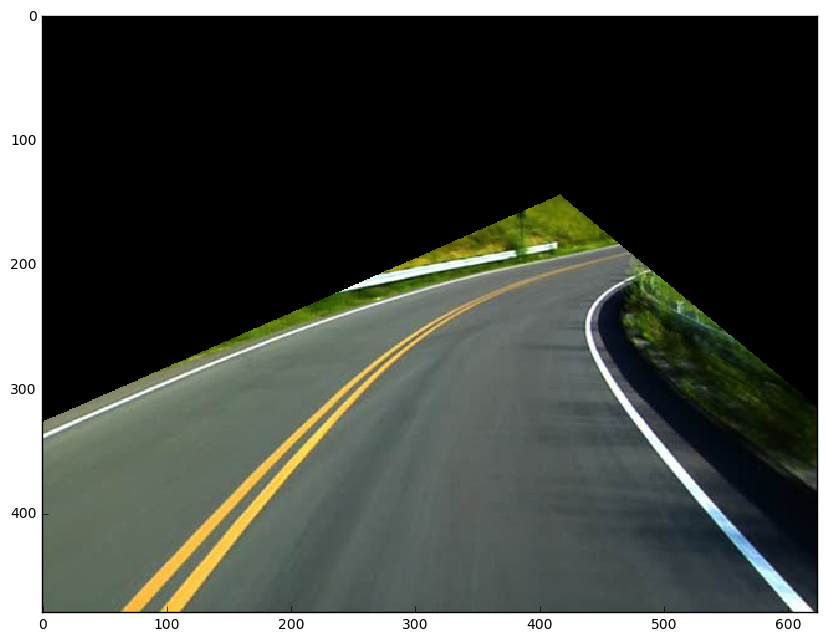

In [186]:
def region_mask(image):
    '''
    Masks all portions of the image that does not include a road. 
    
    input:
    {image}: an image variable assigned by matplotlib.image.imread
    output:
    {region_selection}: the same image with masking applieds
    
    '''
    
    # Pull out the x and y sizes and make a copy of the image
    y_size = image.shape[0]
    x_size = image.shape[1]
    region_selection = np.copy(image)

    # Triangular mask points
    point_A = [-350, y_size]
    point_B = [x_size * 2/3, y_size * 3/10]
    point_C = [x_size + 200, y_size]

    # Create lines of triangular mask
    line_AB = np.polyfit((point_A[0], point_B[0]), (point_A[1], point_B[1]), 1)
    line_BC = np.polyfit((point_C[0], point_B[0]), (point_C[1], point_B[1]), 1)
    line_AC = np.polyfit((point_A[0], point_C[0]), (point_A[1], point_C[1]), 1)

    XX, YY = np.meshgrid(np.arange(0, x_size), np.arange(0, y_size))

    # Thresholding the grid values within the region
    threshold = (YY > (XX * line_AB[0] + line_AB[1])) & \
                (YY > (XX * line_BC[0] + line_BC[1])) & \
                (YY < (XX * line_AC[0] + line_AC[1]))
    threshold = threshold != 1
    
    # Color pixels red within this region
    region_selection[threshold] = [0, 0, 0]

    return region_selection

plt.imshow(region_mask(image_region_mask))

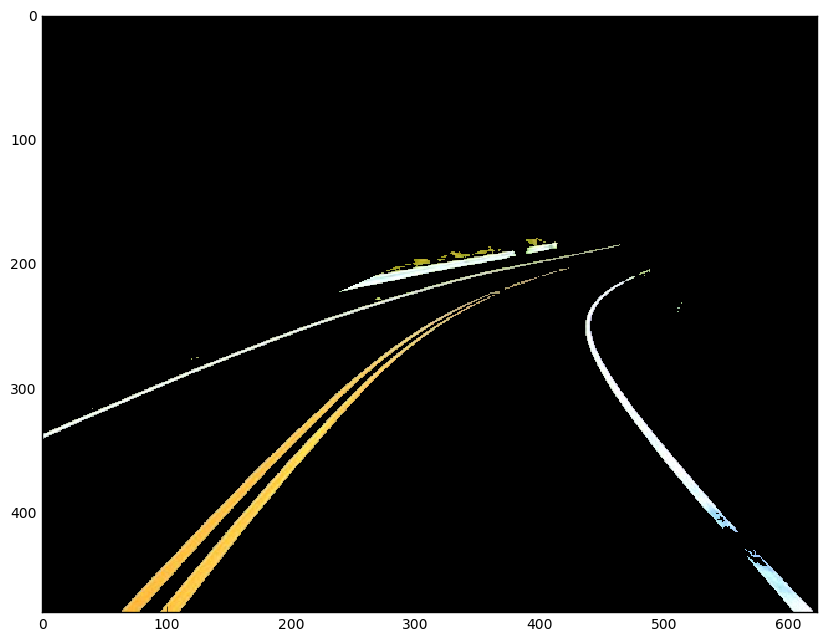

In [185]:
# copy the image
processed_image = np.copy(image)
processed_image = color_mask(processed_image)
processed_image = region_mask(processed_image)

plt.imshow(processed_image)